In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load data
data = np.fromfile('./ws3.dat', dtype=np.float64, sep="\n")
data_name = 'workstation_3'

# Sort data
ordered_data = np.sort(data)

# Create bins for histogram using class intervals defined by equal probability
mean = np.mean(data)
variance = np.var(data)

chi squared = 21.379803086233338
scipy chisq = Power_divergenceResult(statistic=21.33333333333333, pvalue=0.3186781207255988)
scipy chisq = Power_divergenceResult(statistic=21.379803086233338, pvalue=0.3161991597595135)


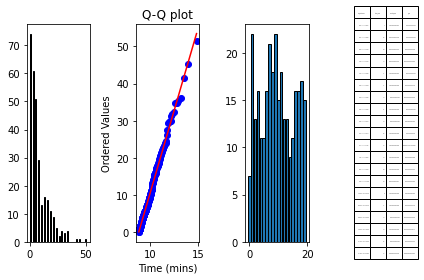

In [15]:
num_bins=20

# Start creating histogram with bins of equal width
fig, ax = plt.subplots(nrows=1, ncols=4)


n, bins, patches = ax[0].hist(data, bins=num_bins, width=0.9, edgecolor='black')

np.savetxt('{}_hist_equal_width.csv'.format(data_name), np.column_stack((bins[1:], n)), delimiter=',', fmt='%f', header='bin_right_edge,frequency')


# Create Q-Q plot
stats.probplot(x=data, dist='expon', plot=ax[1], sparams=(mean))
ax[1].set_title('Q-Q plot')
ax[1].set_xlabel('Time (mins)')


# Create histogram with bins of equal probability
class_intervals = np.fromfunction(lambda i: stats.expon.ppf(i/num_bins, scale=mean), shape=(num_bins,))

# Add max value to class intervals to ensure that last bin is shown on chart
class_intervals = np.append(class_intervals, np.ceil(np.max(data)))

n, bins = np.histogram(data, bins=class_intervals)

ax[2].bar(range(len(class_intervals)-1), n, width=0.9, edgecolor='black')



# Create pandas table for class intervals and frequency
class_intervals_str = ['{:.2f} <= x < {:.2f}'.format(start, end) for start, end in zip(class_intervals[:-1], class_intervals[1:])]

expected_freq = [len(data) * (stats.expon.cdf(end, scale=mean) - stats.expon.cdf(start, scale=mean)) for start, end in zip(class_intervals[:-1], class_intervals[1:])]

chi_sq = [((observed - expected) ** 2)/expected for observed, expected in zip(n, expected_freq)]

df = pd.DataFrame({'class_intervals': class_intervals_str, 'actual_freq': n, 'expected_freq': expected_freq, 'chi_sq': chi_sq})

# df = df.round({'expected_freq': 3, 'chi_sq': 3})
df.to_csv('{}_chi_square.csv'.format(data_name), sep=',', index_label='index')

# cell_text = []
# for row in range(len(df)):
#     cell_text.append([df.iloc[row]['class_intervals'], df.iloc[row]['actual_freq'], '{:.3f}'.format(df.iloc[row]['expected_freq']), '{:.3f}'.format(df.iloc[row]['chi_sq'])])

# ax[2].table(cellText=cell_text, colLabels=df.columns, loc='center')
# ax[2].axis('off')
# ax[2].auto_set_font_size(False)

ax[3].table(cellText=df.values, colLabels=df.columns, loc='center')
ax[3].axis('off')
ax[3].axis('tight')

fig.tight_layout()

degrees_of_freedom = num_bins - 1 - 1

chi_sq_val = sum(chi_sq)
print('chi squared = {}'.format(chi_sq_val))
print('scipy chisq = {}'.format(stats.chisquare(f_exp=(len(data)/num_bins), f_obs=n)))
print('scipy chisq = {}'.format(stats.chisquare(f_exp=df['expected_freq'], f_obs=n)))

Text(0.5, 1.0, 'Q-Q plot')

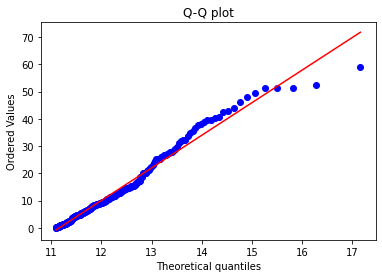

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)

stats.probplot(x=data, dist='expon', plot=ax, sparams=(mean))
ax.set_title('Q-Q plot')
# ax.set_xlabel('Time (mins)')


In [5]:
# Create histogram with bins of equal probability
class_intervals = np.fromfunction(lambda i: stats.expon.ppf(i/num_bins, scale=mean), shape=(num_bins,))

n, bins = np.histogram(data, bins=class_intervals)

expected_freq = [len(data) * (stats.expon.cdf(end, scale=mean) - stats.expon.cdf(start, scale=mean)) for start, end in zip(class_intervals[:-1], class_intervals[1:])]

print(stats.chisquare(f_obs=n, f_exp=expected_freq))

Power_divergenceResult(statistic=17.533333333333342, pvalue=0.48676913318000303)
